# TP - EPITA 2023 - AI for IQA

# Part 1 - Designing annotation campaigns to build IQA datasets

> ### Question1: Cite five difficulties encountred when developping an IQA dataset

> #### A1:

Subjective Assessment : Gathering quality scores from humans is resource-intensive and subjective.

Image Diversity: Ensuring diverse images covering various aspects is complex.

Ground Truth Data: Creating accurate reference images and controlled distortions is challenging.

Scalability: Handling a large number of images and assessments is time-consuming.

Validation and Benc hmarking: Defining evaluation protocols and metrics for IQA algorithms is complex.

> ### Question2: Cite four methods of annotating image quality

> #### A2:

Subjective Human Scoring: Image quality is assessed by human raters who assign quality scores based on their perception, typically using Mean Opinion Scores (MOS) scales.

Objective Metrics: Image quality is quantitatively measured using automated metrics such as PSNR (Peak Signal-to-Noise Ratio) and SSIM (Structural Similarity Index), providing numerical quality scores based on image characteristics.

Reference vs. Distorted Pairs: Annotators compare pairs of images, one being a high-quality reference, and the other a distorted version, to assess the degree of distortion or quality difference.

Binary Quality Labeling: Annotators assign simple binary labels (eg: good or bad) to images based on whether they meet a predefined quality threshold, simplifying quality assessment to a categorical judgment.

> ### Question3: For the two most common methods, which one do you think is a better choice? Cite a situation for each method where it is preferable. Answer these questions by citing two pros and two cons of each method and argument your choice of situations.


> #### A3:

Objective Metrics is better in my opinion.

Pros:

- Efficiency: Automated and fast, allowing for quick and consistent quality assessments, making it suitable for large datasets.

- Quantitative: Provides numerical quality scores, making it easier to compare and rank images objectively.

Cons:

- May Not Capture All Aspects: Some aspects of image quality, such as aesthetics or artistic value, may not be accurately assessed by objective metrics.

- Limited to Technical Quality: Primarily measures technical aspects of quality, like sharpness and noise, and may not consider perceptual aspects.

> ### Q4: Let's now focus on Pairwise comparison methods (PWC) and Mean Opinion Score (MOS). Let's imagine that comparing the quality between two images can take on average 5 seconds (PWC), while evaluating the quality of a single image can take around 15 seconds (MOS). Calculate the necessary time to do a full pass of annotations for one person for both methods in Q3. What's the total number of data points (comparisons for PWC and evaluations for MOS) for both methods?


> #### A4:

- Pairwise Comparison (PWC):

Time to compare two images: 5 sec
Number of comparisons : N(N-1)/2
The total time for PWC for N images: (N(N-1)/2) * 5 sec

- Mean Opinion Score (MOS):

Time to evaluate one image: 15 sec
The total time for MOS for N images: N * 15 sec

For Pairwise Comparison (PWC), each comparison yields one data point.
For Mean Opinion Score (MOS), each evaluation yields one data point.
So, for both methods, the total number of data points is:

- PWC: N(N-1)/2 data points
- MOS: N data points

> ### Q5: Given an annotation campaign with N images. How does the time spent on the full annotation campaign change for each method? Plot the evolution of the total annotation cost per person (in minutes) in terms of N (1 to 50) for both methods. What is the minimum number of images on which comparisons (PWC) is more costly?


#### A5:

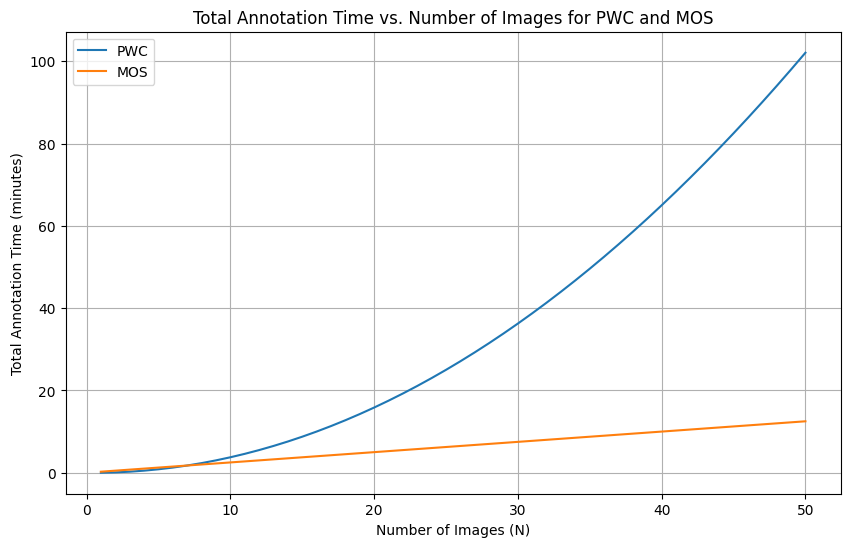

In [27]:
import matplotlib.pyplot as plt

PWC_times = []
MOS_times = []

for N in range(1, 51) :
    PWC_time = (5 * N * (N - 1)) / 2 / 60
    MOS_time = (15 * N) / 60
    PWC_times.append(PWC_time)
    MOS_times.append(MOS_time)

plt.figure(figsize=(10, 6))
plt.plot(N_values, PWC_times, label='PWC')
plt.plot(N_values, MOS_times, label='MOS')
plt.xlabel('Number of Images (N)')
plt.ylabel('Total Annotation Time (minutes)')
plt.legend()
plt.title('Total Annotation Time vs. Number of Images for PWC and MOS')
plt.grid(True)
plt.show()

Therefore, the minimum number of images on which comparisons (PWC) is more costly is ~7.

> ### Q6: Redo the plot of Q5 taking into consideration that we need five times more single annotations to reach a similar precision with the comparisons

> #### A6:

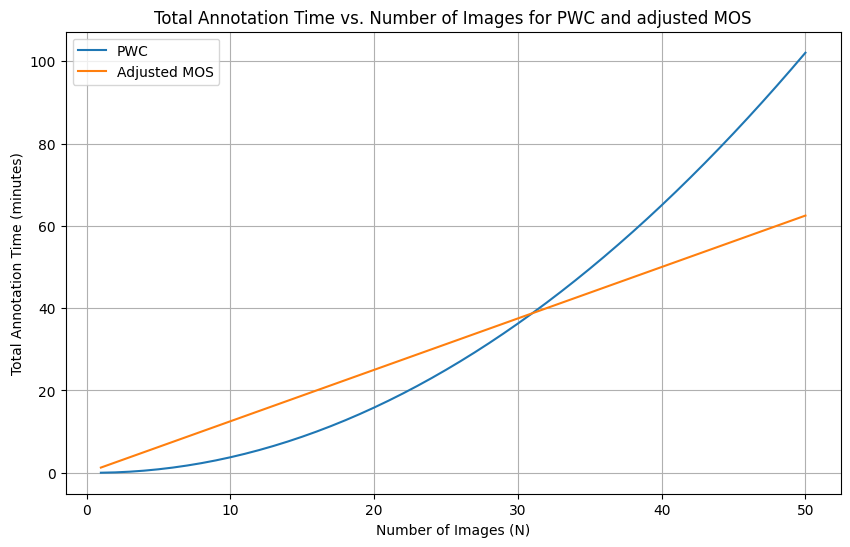

In [32]:
PWC_times = []
adjusted_MOS_times = []

for N in range(1, 51):
    PWC_time = (5 * N * (N - 1)) / 2 / 60
    adjusted_MOS_time = (5 * 15 * N) / 60
    PWC_times.append(PWC_time)
    adjusted_MOS_times.append(adjusted_MOS_time)

plt.figure(figsize=(10, 6))
plt.plot(N_values, PWC_times, label='PWC')
plt.plot(N_values, adjusted_MOS_times, label='Adjusted MOS')
plt.xlabel('Number of Images (N)')
plt.ylabel('Total Annotation Time (minutes)')
plt.legend()
plt.title('Total Annotation Time vs. Number of Images for PWC and adjusted MOS')
plt.grid(True)
plt.show()

> ### Q7: For big data sets, it is not feasible to do a complete design for all annotators and all images. How can we reduce the number of comparisons without losing much precision?

> #### A7:


> When the data is large, it is not possible to achieve a complete design (a full passage on all data points for each observer), hence a sampling strategy is necessary. To make big annotation campaigns more efficient, we can resort to active sampling techniques. Active sampling [1,2,3,4,5] is the process of optimally choosing the image pairs for PWC annotation tasks. Some of these techniques are more sophisticated than others.
>   ###### [1] Chen, Bennett, Collins-Thompson, Horvitz (2013). Pairwise ranking aggregation in a crowdsourced setting. In Proceedings of the sixth ACM international conference on Web search and data mining, pp. 193–202
>   ###### [2] Ye, Doermann (2014). Active sampling for subjective image quality assessment. In Proceedings of the IEEE conference on computer vision and pattern recognition, pp. 4249–4256.
>   ###### [3] Li, Mantiuk, Wang, Ling, Callet (2018). Hybrid-MST: A hybrid active sampling strategy for pairwise preference aggregation. arXiv preprint arXiv:1810.08851, pp.
>   ###### [4] Xu, Xiong, Chen, Huang, Yao (2018). Hodgerank with information maximization for crowdsourced pairwise ranking aggregation. In Proceedings of the AAAI Conference on Artificial Intelligence, pp.
>   ###### [5] Mikhailiuk, Wilmot, Perez-Ortiz, Yue, Mantiuk (2020). Active Sampling for Pairwise Comparisons via Approximate Message Passing and Information Gain Maximization. arXiv preprint arXiv:2004.05691, pp.
> ### Q8: What do you think are straighforward techniques of sampling in a pairwise comparison experiment (other than the ones mentioned above)? list two

> #### A8:

- Random Sampling: Random sampling ensures that each pair has an equal chance of being selected, which can help avoid bias in the dataset.

- Systematic Sampling: Systematic sampling involves selecting pairs at regular intervals from the dataset.

# Part 2 - PWC simulation experiment

In this part, we will be testing the previous assumptions by simulating a pairwise comparison experiment

In [3]:
import numpy as np
import time
import random
import math
from numpy.random import normal
import matplotlib.pyplot as plt
import torch
from scipy.stats import spearmanr, pearsonr
from sklearn.metrics import mean_squared_error
from scipy.stats import truncnorm
plt.rcParams['figure.figsize'] = [12.0, 8.0]

!pip install networkx==2.8.5
import networkx as nx

nx.__version__

Defaulting to user installation because normal site-packages is not writeable


'2.8.5'

In [2]:
# The following lines install the necessary packages in the colab environment
try:
    from google.colab import files
    !pip install -q hdf5storage

    !rm -fr TP-IQA
    !git clone --single-branch --quiet https://github.com/DXOMARK-OCTO/TP-IQA
    !cp -r TP-IQA/* .

except ImportError:
    # %matplotlib notebook
    pass

%matplotlib inline

import activepwcanalysis as adaComp
from activepwcanalysis import predictNext

ModuleNotFoundError: No module named 'activepwcanalysis'

> ### Q9: List the essential steps to simulate a pairwise comparison experiment.

> #### A9:


## A - Observer simulator model

> Scaling methods transform the comparison matrices in a pairwise comparison experiment into JOD scores (Image quality scores). These methods assume that the quality of an image, from an observer's point of view, follows a certain probability distribution. This is called an observer model and is still subject to research. We will follow the popular Thurstone case V (Thurstone, 1927) model [6]. This model supposes that the quality difference between two images follows a random Gaussian distribution, whose uncertainty reflects the inter and intra-annotator disagreement. This noise follows the rule that for two images $r_i, r_j$, if 75\% of the comparisons indicated that $r_i$ was of better quality than $r_j$ , $P(r_i > r_j) = 0.75$, then the difference is exactly 1 $JOD$ (a unit in our image quality scale). For this distance and probability, for a gaussian distribution with 0 mean, the standard deviation is $\sigma=1.4826$.
> ###### [6] A practical guide and software for analysing pairwise comparison experiments. arXiv preprint arXiv:1712.03686, pp

> ### Q10: Fill in the following function, called pwcObserverSimulator, that takes a pair of image scores (pairScores), the standard deviation (jodStd) and returns a simulated comparison based on the Thurstone case V observer model. The function should return the rank of the input images:
> ### - (0,1) if the second image is better or
> ### - (1,0) if the first element has better quality.
> ### The function should also return the score difference with the noise.

In [4]:
def pwcObserverSimulator(pairScores, jodStd=1.4826, **kwargs):
    """
     1 - Our simulator takes a pair of images with known quality scores (1,2,3,4,),
     2 - Adds an observer bias that follows N(0, jodStd)
     3 - Computes the difference and returns the rank and the score difference with the observer's bias
    """

    score_img1, score_img2 = pairScores
    observer_bias = np.random.normal(0, jodStd)

    scorediff = score_img1 - score_img2 + observer_bias

    rank = (0, 1)
    if scorediff > 0:
        rank = (1, 0)

    return rank,scorediff

In [8]:
# test
pwcObserverSimulator((1, 2)), pwcObserverSimulator((3, 4)), pwcObserverSimulator((3, 1))

(((0, 1), -0.9786500909634778),
 ((0, 1), -0.9736528019946965),
 ((1, 0), 2.0426271804839087))

> ### A10:

> ### Q11: Fill in the following function, called mosObserverSimulator, that takes an image score, adds noise, and returns the estimated MOS score, rounded to a certain precision.

In [16]:
def mosObserverSimulator(imageScore, mosStd, **kwargs):
    """
     1 - Our simulator takes an image with a known quality score (1,2,3,4,),
     2 - Adds an observer bias that follows N(0, mosStd)
     3 - Computes and returns the new noisy score
    """
    bias = np.random.normal(0, mosStd)

    noisy_score = imageScore + bias

    return round(noisy_score, 1) # precision = 2

In [17]:
# test
mosObserverSimulator(1, 0.2), mosObserverSimulator(3, 0.2), mosObserverSimulator(3, 0.2)

(0.8, 2.8, 3.1)

> A11:

## B - Sampling algorithms


> To see the effectiveness of the active sampling, we will be comparing a popular algorithm, ASAP [5] to three other simple sampling approaches: random sampling, ranking based sampling, and an optimized ranking based sampling. Sometimes, sampling algorithms can be computionally heavy. To accelerate the sampling process, instead of generating one pair at a time, we generate a batch of pairs, where each image is present at least one time. In total, we have batches of size n-1.

> ### Q12: Fill in the first two of the following functions that implement the three sampling approaches mentioned above.

In [42]:
def randomSampling(**kwargs):
    """
    1 - Takes the number of images and generate a batch of n-1 pairs where all images are at least once (we should avoid comparing the pair with itself)
    2 - Return the list of pairs
    """
    nbImages = kwargs.get('nbImages', None)

    if nbImages is None or nbImages < 2:
        raise ValueError("nbImages should be at least 2 for random sampling.")

    image_indices = np.arange(nbImages)
    
    random.shuffle(image_indices)

    pairs = [(image_indices[i], image_indices[i+1]) for i in range(nbImages - 1)]
    
    return pairs

def rankingBasedSampling(**kwargs):
    """
    1 - Takes the image scores and calculates the rank of each image.
    2 - Based on the ranking, select a batch of n-1 pairs, by taking the consecutive pairs of images.
    3 - Return the list of pairs
    """
    compMat = kwargs.get('imageScores', None)

    if imageScores is None or len(imageScores) < 2:
        raise ValueError("imageScores should contain scores for at least two images for ranking-based sampling.")

    ranked_images = np.argsort(imageScores)

    pairs = [(ranked_images[i], ranked_images[i+1]) for i in range(len(ranked_images) - 1)]

    return pairs
    
def optRankingBasedSampling(**kwargs):
    """
    1 - Takes the image scores and calculates the rank of each image.
    2 - Based on the ranking, select a batch of n-1 pairs, by randomly sampling from the local neighbors around each image (25% of the total images).
    3 - Return the list of pairs
    """
    imageScores = kwargs.get('imageScores', None)

    neighborSize = math.ceil(0.05 * len(imageScores))

    if neighborSize <=1:
        return rankingBasedSampling(imageScores=imageScores)

    sortedIndices = np.argsort(imageScores)

    indicesSelected = []
    pairList = []

    while(len(indicesSelected) < len(imageScores)):
        selectedNode = random.sample([idx for idx in sortedIndices if idx not in indicesSelected], 1)[0]

        minBound = max(0, selectedNode - neighborSize//2)
        maxBound = min(len(imageScores), minBound + neighborSize +1)

        neighbourPool = [idx for idx in sortedIndices[minBound: maxBound] if idx!=selectedNode]
        pairSelected = (selectedNode, random.sample(neighbourPool,1)[0])
        pairList += [pairSelected]
        indicesSelected += [selectedNode]

    pairList.remove(next(p for p in pairList if next(q for q in indicesSelected if len([k for k in pairList if q in k]) > 2) in p ))
    return pairList

In [45]:
# test

nbImages = 5
imageScores = [3.2, 4.0, 2.5, 4.5, 3.8]

random_pairs = randomSampling(nbImages=nbImages)
print("Random Sampling Pairs:", random_pairs)

ranking_pairs = rankingBasedSampling(imageScores=imageScores)
print("Ranking-Based Sampling Pairs:", ranking_pairs)

opt_ranking_pairs = optRankingBasedSampling(imageScores=imageScores)
print("OPT Ranking-Based Sampling Pairs:", opt_ranking_pairs)

Random Sampling Pairs: [(4, 0), (0, 1), (1, 2), (2, 3)]
Ranking-Based Sampling Pairs: [(2, 0), (0, 4), (4, 1), (1, 3)]
OPT Ranking-Based Sampling Pairs: [(2, 0), (0, 4), (4, 1), (1, 3)]


## C - Monte Carlo Simulation

> To simulate a PWC experiment, we need the following elements:
>   - The number of images
>   - The number of standard trials (1 st = number of full pass over the images)
>   - The observer simulation parameters
>   - The scaling algorithm
>   - The sampling algorithm
>   - The ground truth scores of the images
>   - The performance evaluation metrics

> ### Q13: Fill in the following function, called monteCarloPwcSim, that takes the list of image scores, the number of standard trials, the observer simulator and the sampling algorithm function, simulates a pairwise comparison experiment and returns the average image scores after each batch of pairs. Each batch of pairs is equal to n-1 pairs.

> A13:

In [62]:
from scipy.stats import pearsonr, spearmanr

def myMonteCarloPwcSim(groundTruthScores, nbTrials, observerSimulator, samplingAlgorithm, **kwargs):
    """
    1 - Our simulator takes the list of groundtruth image scores, the number of standard trials, and the simulations functions
    2 - For each iteration, we compute the image scores
    3 - Then, we select the next batch of pairs where each batch consists for n-1 pairs, where n is the number of images. In this case, 1 st = n/2 * nb batches.
    4 - We simulate the comparisons and update the comparison matrix
    5 - Returns the average image scores per batch.
    """
    useCuda = torch.cuda.is_available()
    nbImages = len(groundTruthScores)
    nbSimulations = kwargs.get('nbSimulations', 1)

    # Total number of comparisons
    totalComparisons = nbImages * (nbImages - 1)/2 * nbTrials
    # Total number of batches
    nbBatches = math.ceil(nbImages/2 * nbTrials)

    simulatedJodScores ,simulatedStdScores ,simulatedPLCCScores ,simulatedSROCCScores = [[] for i in range(4)]
    time1 = time.time()

    for i in range(nbSimulations):
        # Intialize comparison matrix
        compMat = np.zeros((nbImages, nbImages))
        # Initiate batch of image pairs
        compBatch = randomSampling(nbImages=nbImages)
        jodScoresEvolution = []
        jodStdEvolution = []
        jodsPLCCEvolution = []
        avgSROCCEvolution = []
        for batch in range(nbBatches-1):
            # Simulate comparisons
            for pair in compBatch:
                # Simulate observer, always first element is best
                pairScores = [groundTruthScores[pair[0]], groundTruthScores[pair[1]]]
                orderedPairIdx, _ = observerSimulator(pairScores)
                orderedPair = [pair[orderedPairIdx[0]], pair[orderedPairIdx[1]]]
                # Update comparison matrix
                compMat = adaComp.updateCompMat(orderedPair, compMat)

            # Score generation
            jodScores,jodStds = adaComp.JODScores(compMat)
            jodsPLCCEvolution += [pearsonr(jodScores, groundTruthScores)[0]]
            avgSROCCEvolution += [spearmanr(jodScores, groundTruthScores)[0]]
            jodScoresEvolution += [jodScores]
            jodStdEvolution += [jodStds]
            compBatch = samplingAlgorithm(compMat=compMat, nbImages=nbImages, imageScores=jodScores, useCuda=useCuda)


        simulatedJodScores += [jodScoresEvolution]
        simulatedStdScores += [jodStdEvolution]
        simulatedPLCCScores += [jodsPLCCEvolution]
        simulatedSROCCScores += [avgSROCCEvolution]


    # evolution (per Batch) of the simulated jod scores
    avgJodScoreEvolution = np.mean(simulatedJodScores, axis=0)
    avgStdScoreEvolution = np.mean(simulatedStdScores, axis=0)
    avgPLCCScoreEvolution = np.mean(simulatedPLCCScores, axis=0)
    avgSROCCEvolution = np.mean(simulatedSROCCScores, axis=0)

    return (avgStdScoreEvolution, avgSROCCEvolution, avgPLCCScoreEvolution), (time.time()-time1)/nbSimulations

This function is a Monte Carlo simulation made to assess the performance of an image quality assessment model. 

Firstly, it initializes some parameters, such as the availability of CUDA for parallel processing and the number of image comparisons and batches. 
Secondly, in each simulation, it creates a comparison matrix and generates batches of image pairs, then proceeds to simulate quality comparisons, updating the matrix. 

After that, JOD scores, standard deviations, and correlation coefficients are calculated based on these comparisons. 
Then, the function exploits a sampling algorithm to determine the next batch of pairs for comparisons. 

After processing multiple simulations, it aggregates the results by calculating average quality scores and correlation coefficients, providing valuable insights into the model's performance. 

The function returns these aggregated results as well as the average time taken per simulation.

> ### Q14: What are the two types of correlations that can be used to evaluate the performance of our simulation? What's the difference between them?

>  A14:


- Pearson Correlation, which assesses the linear relationship between two continuous variables
- Spearman Rank Correlation, which is a non-parametric measure of association and is used when the data is not assumed to be normally distributed or when the variables are measured on an ordinal or rank scale.

The pearson correlation is appropriate for continuous data with a linear relationship, while Spearman rank correlation is appropriate for ordinal data or data with non-linear relationships. 

> ### Q15 - Finally, lets define a function that generates, the ground truth score of a set of images. Define a function with input jodRange and nbImages, and outputs a set of 'nbImages' elements o values from 0 to jodRange.

> A15:

In [63]:
def generate_ground_truth_scores(jodRange, nbImages):
    ground_truth_scores = [random.randint(0, jodRange) for _ in range(nbImages)]
    return np.array(ground_truth_scores)

In [64]:
# test
jodRange = 100
nbImages = 20 
scores = generate_ground_truth_scores(jodRange, nbImages)
print(scores)

[76 25 14 53 54 78 79 55 58 78 11  2 42 97 26  2 85 79 20 59]


> ### Q16: Let's fix the number of images in the data set to 20 and their JOD range to 10. Using the previous code, plot the evolution of the SROCC, PLCC and STD as we augment the number of standard trials up to 3, for all the 4 algorithms. What conclusion can you extract?

> A16:

In [200]:
# Function to calculate JODScores without using adaComp

def JODScores(compMat):
    num_items = compMat.shape[0]
    jodScores = []
    jodStds = []

    for i in range(num_items):
        jod_score = 0
        num_comparisons = 0

        for j in range(num_items):
            if i != j:
                jod_ij = compMat[i, j] - compMat[j, i]
                jod_score += jod_ij
                num_comparisons += 1

        if num_comparisons > 0:
            jod_score /= num_comparisons
            jodScores.append(jod_score)

            jod_std = sum((jod_ij - jod_score) ** 2 for j in range(num_items) if i != j) / num_comparisons
            jodStds.append(jod_std)
        else:
            jodScores.append(0.0)
            jodStds.append(0.0)

    return jodScores, jodStds

In [201]:
# Function to update the comparison matrix

def updateCompMat(orderedPair, compMat):
    i, j = orderedPair
    updatedCompMat = np.copy(compMat)

    updatedCompMat[i, j] += 1
    updatedCompMat[j, i] -= 1

    return updatedCompMat

In [202]:
def myMonteCarloPwcSim_(groundTruthScores, nbTrials, observerSimulator, samplingAlgorithm, **kwargs):
    useCuda = torch.cuda.is_available()
    nbImages = len(groundTruthScores)
    nbSimulations = kwargs.get('nbSimulations', 1)

    # Total number of comparisons
    totalComparisons = nbImages * (nbImages - 1)/2 * nbTrials
    # Total number of batches
    nbBatches = math.ceil(nbImages/2 * nbTrials)

    simulatedJodScores ,simulatedStdScores ,simulatedPLCCScores ,simulatedSROCCScores = [[] for i in range(4)]
    time1 = time.time()

    for i in range(nbSimulations):
        # Intialize comparison matrix
        compMat = np.zeros((nbImages, nbImages))
        # Initiate batch of image pairs
        compBatch = randomSampling(nbImages=nbImages)
        jodScoresEvolution = []
        jodStdEvolution = []
        jodsPLCCEvolution = []
        avgSROCCEvolution = []
        for batch in range(nbBatches-1):
            # Simulate comparisons
            for pair in compBatch:
                # Simulate observer, always first element is best
                pairScores = [groundTruthScores[pair[0]], groundTruthScores[pair[1]]]
                orderedPairIdx, _ = observerSimulator(pairScores)
                orderedPair = [pair[orderedPairIdx[0]], pair[orderedPairIdx[1]]]
                # Update comparison matrix
                compMat = updateCompMat(orderedPair, compMat)

            # Score generation
            jodScores,jodStds = JODScores(compMat)
            pr_score = pearsonr(jodScores, groundTruthScores)[0]
            sr_score = spearmanr(jodScores, groundTruthScores)[0]
            jodsPLCCEvolution += [pr_score]
            avgSROCCEvolution += [sr_score]
            jodScoresEvolution += [jodScores]
            jodStdEvolution += [np.mean(np.array([jodStds]))]
            compBatch = samplingAlgorithm(compMat=compMat, nbImages=nbImages, imageScores=jodScores, useCuda=useCuda)


        simulatedJodScores += [jodScoresEvolution]
        simulatedStdScores += [jodStdEvolution]
        simulatedPLCCScores += [jodsPLCCEvolution]
        simulatedSROCCScores += [avgSROCCEvolution]


    # evolution (per Batch) of the simulated jod scores
    avgJodScoreEvolution = np.mean(simulatedJodScores, axis=0)
    avgStdScoreEvolution = np.mean(simulatedStdScores, axis=0)
    avgPLCCScoreEvolution = np.mean(simulatedPLCCScores, axis=0)
    avgSROCCEvolution = np.mean(simulatedSROCCScores, axis=0)

    return (avgStdScoreEvolution, avgSROCCEvolution, avgPLCCScoreEvolution), (time.time()-time1)/nbSimulations

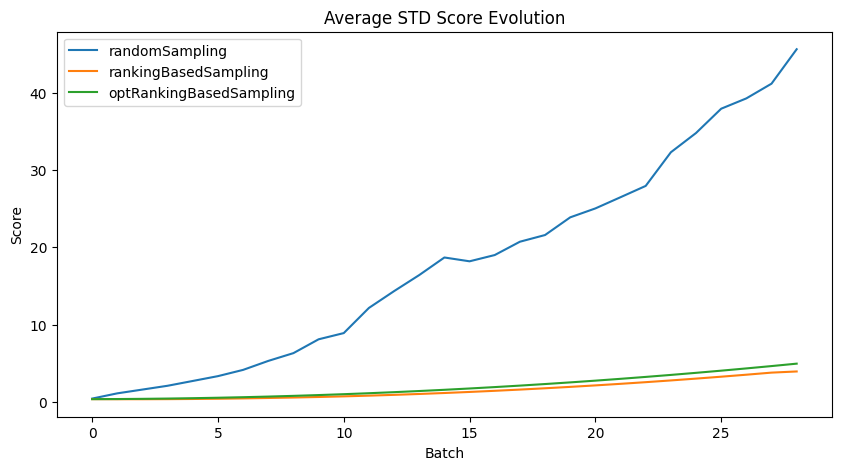

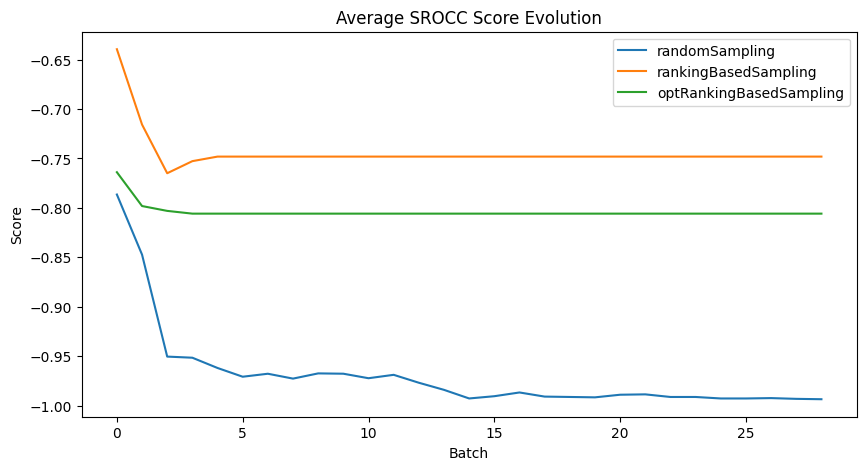

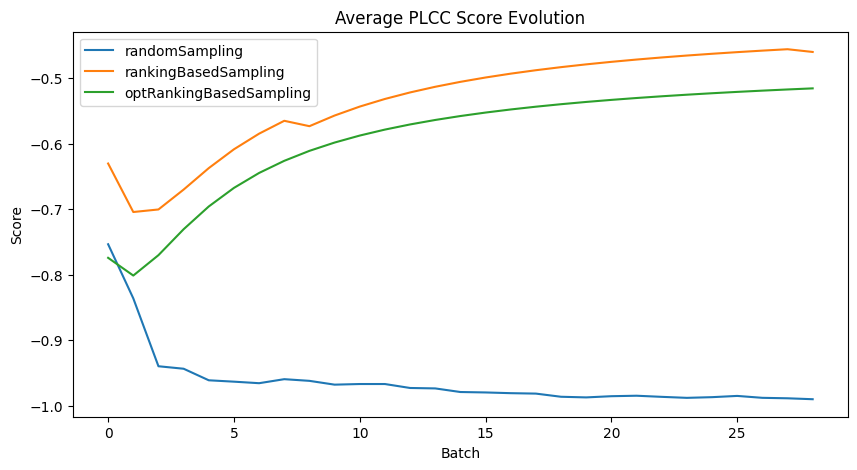

In [203]:
res1 = myMonteCarloPwcSim_(generate_ground_truth_scores(10, 20), 3, pwcObserverSimulator, randomSampling)
res2 = myMonteCarloPwcSim_(generate_ground_truth_scores(10, 20), 3, pwcObserverSimulator, rankingBasedSampling)
res3 = myMonteCarloPwcSim_(generate_ground_truth_scores(10, 20), 3, pwcObserverSimulator, optRankingBasedSampling)

x_axis = range(len(res1[0][0]))

# Plot avgStdScoreEvolution
plt.figure(figsize=(10, 5))
plt.plot(x_axis, res1[0][0], label='randomSampling')
plt.plot(x_axis, res2[0][0], label='rankingBasedSampling')
plt.plot(x_axis, res3[0][0], label='optRankingBasedSampling')
plt.xlabel('Batch')
plt.ylabel('Score')
plt.title('Average STD Score Evolution')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(x_axis, res1[0][1], label='randomSampling')
plt.plot(x_axis, res2[0][1], label='rankingBasedSampling')
plt.plot(x_axis, res3[0][1], label='optRankingBasedSampling')
plt.xlabel('Batch')
plt.ylabel('Score')
plt.title('Average SROCC Score Evolution')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(x_axis, res1[0][2], label='randomSampling')
plt.plot(x_axis, res2[0][2], label='rankingBasedSampling')
plt.plot(x_axis, res3[0][2], label='optRankingBasedSampling')
plt.xlabel('Batch')
plt.ylabel('Score')
plt.title('Average PLCC Score Evolution')
plt.legend()
plt.show()

We observe that the standard deviations tend to increase with the number of batches for all types of sampling. It increases nonetheless faster for random sampling.

As the std of quality scores increases, it suggests that the model's predictions are becoming less consistent, stable or precise across the different batches of image comparisons, even more for the simulation with random sampling.

We can also observe that SROCC and PLCC scores tend to converge to medium, even high, negative correlations, between -0.4 and -1.0, compared to the number of batches.

The negative correlations are a predicted behavior of the simulation, since the more the score of differences (JODScore) decreases the more the groundtruth score increases. It suggests that the quality of the rankings or the data similarity to the ground truth is improving as more comparisons are made.

Overall, we can notice that the simulation makes a better prediction with a random sampling (almost -1.0 on both correlation scores), than with a ranking based sampling or an opt ranking based sampling (-0.4 to -0.8 on both correlation scores).

> ### Q17: Let's now fix the number of standard trials (a.k.a the number of comparisons) to 1.5, and vary the JOD range of the scene. Plot again the SROCC, PLC and STD according to a varing JOD (2-20), for your 4 sampling algorithms. How do you interpret the results? Regarding the std, which sapling algorithm is better? why do you think this is the case?

> A17:

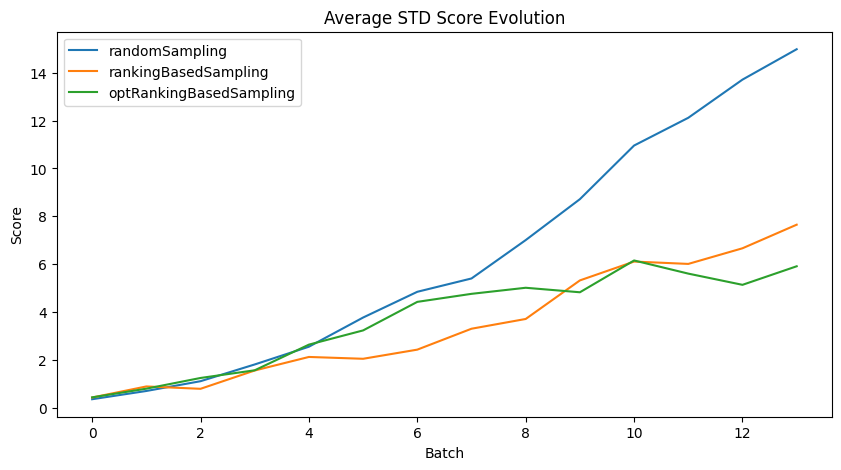

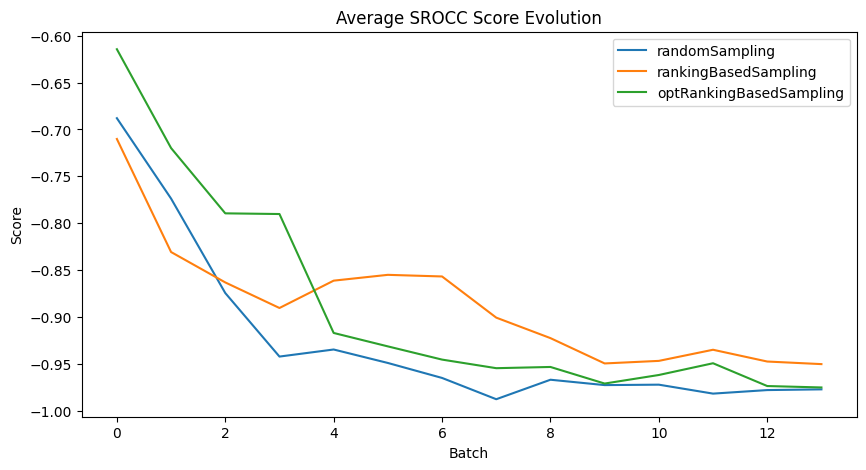

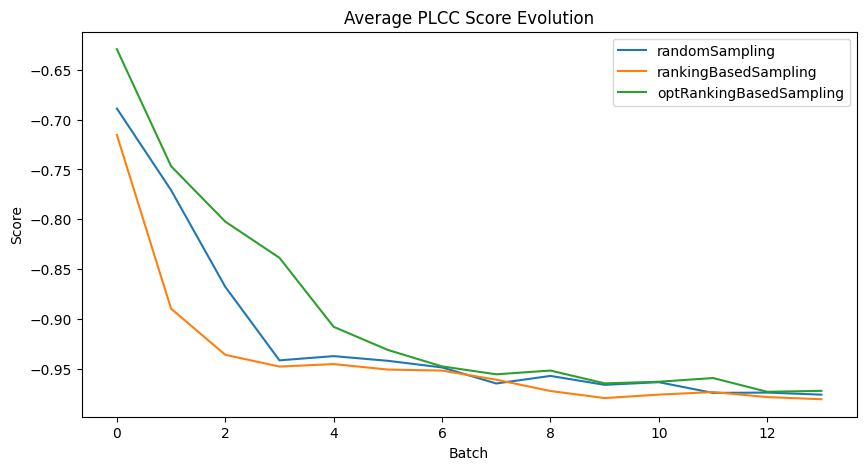

In [206]:
res1 = myMonteCarloPwcSim_(generate_ground_truth_scores(random.randint(2, 20), 20), 1.5, pwcObserverSimulator, randomSampling)
res2 = myMonteCarloPwcSim_(generate_ground_truth_scores(random.randint(2, 20), 20), 1.5, pwcObserverSimulator, randomSampling)
res3 = myMonteCarloPwcSim_(generate_ground_truth_scores(random.randint(2, 20), 20), 1.5, pwcObserverSimulator, randomSampling)

x_axis = range(len(res1[0][0]))

# Plot avgStdScoreEvolution
plt.figure(figsize=(10, 5))
plt.plot(x_axis, res1[0][0], label='randomSampling')
plt.plot(x_axis, res2[0][0], label='rankingBasedSampling')
plt.plot(x_axis, res3[0][0], label='optRankingBasedSampling')
plt.xlabel('Batch')
plt.ylabel('Score')
plt.title('Average STD Score Evolution')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(x_axis, res1[0][1], label='randomSampling')
plt.plot(x_axis, res2[0][1], label='rankingBasedSampling')
plt.plot(x_axis, res3[0][1], label='optRankingBasedSampling')
plt.xlabel('Batch')
plt.ylabel('Score')
plt.title('Average SROCC Score Evolution')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(x_axis, res1[0][2], label='randomSampling')
plt.plot(x_axis, res2[0][2], label='rankingBasedSampling')
plt.plot(x_axis, res3[0][2], label='optRankingBasedSampling')
plt.xlabel('Batch')
plt.ylabel('Score')
plt.title('Average PLCC Score Evolution')
plt.legend()
plt.show()

Like earlier, we observe that the standard deviations tend to increase with the number of batches for all types of sampling. It still increases faster for random sampling, but to a less great value.

It means that we have gained in stability, consistency or precision for the model's prediction quality using random sampling across the different batches.

We can also observe that all SROCC and PLCC scores tend to converge high negative correlations, between -0.9 and -1.0, compared to the number of batches.

It means that we have gained in predictive quality for all types of sampling.

Overall, we can notice that the simulation still makes a better prediction with a random sampling, but the differences are really small, all the types of sampling having globally the same level of predictive quality regarding the correlations.

> ### Q18: What are the conclusions you can make from this experiment? What approach performs better and in what situtations?

> #### A18:


We can conclude that the random sampling seems to provide the better results. Nonetheless, when the JOD is varying, all the types of sampling seem to provide the same good results.